In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 패키지 import
import statsmodels.api as sm
import sklearn

# 한글 설정 /차트 마이너스 깨짐현상 해결
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

### 패션MNIST 데이터

#### 데이터 로드

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = load_data()

#### 정규화

In [4]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
train_scaled = train_input / 255.0

In [6]:
print(train_scaled.shape)

(60000, 28, 28)


In [7]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [8]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델생성 함수

In [9]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeModel')
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력값을 1차원으로
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [10]:
# 함수 사용예
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선, 정확도

In [11]:
model = model_fn()
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 4s - loss: 0.5366 - accuracy: 0.8094 - 4s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 3s - loss: 0.3970 - accuracy: 0.8580 - 3s/epoch - 2ms/step
Epoch 3/5
1500/1500 - 3s - loss: 0.3549 - accuracy: 0.8734 - 3s/epoch - 2ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3334 - accuracy: 0.8778 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3196 - accuracy: 0.8870 - 2s/epoch - 2ms/step


In [13]:
history.history

{'loss': [0.5366095900535583,
  0.3970114290714264,
  0.35493189096450806,
  0.3334072232246399,
  0.3196217715740204],
 'accuracy': [0.809374988079071,
  0.8580208420753479,
  0.8734166622161865,
  0.8778333067893982,
  0.8870208263397217]}

#### 손실곡선 차트

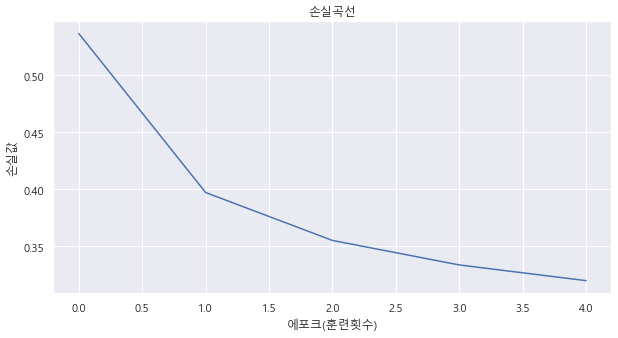

In [14]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.show()

#### 정확도 차트

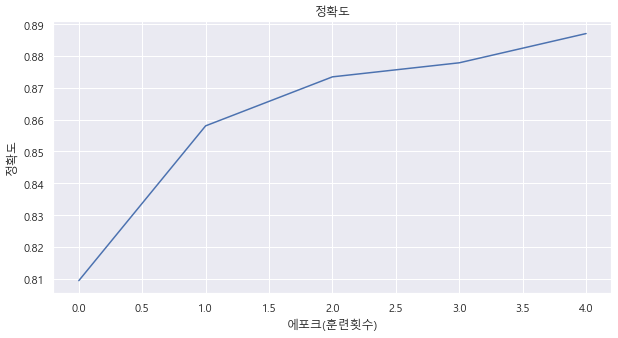

In [15]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('정확도')
plt.show()

#### 에프크 20번 훈련

In [16]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5333 - accuracy: 0.8114
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3922 - accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3567 - accuracy: 0.8712
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3333 - accuracy: 0.8796
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3176 - accuracy: 0.8860
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3068 - accuracy: 0.8913
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2970 - accuracy: 0.8942
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2893 - accuracy: 0.8971
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.9017
Epoch 10/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.276

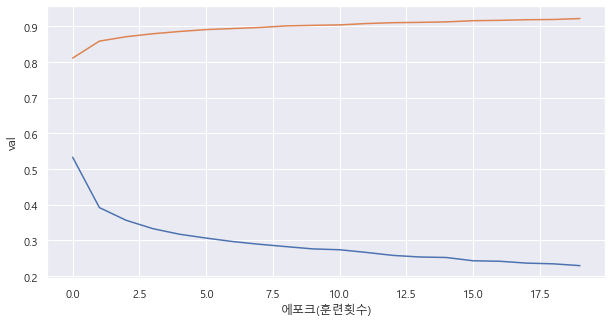

In [17]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('val')
plt.show()

### 검증손실

#### 훈련세트 훈련 -> 정확도 92%

In [20]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5340 - accuracy: 0.8109 - val_loss: 0.4356 - val_accuracy: 0.8432
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3942 - accuracy: 0.8584 - val_loss: 0.3773 - val_accuracy: 0.8638
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3561 - accuracy: 0.8733 - val_loss: 0.3665 - val_accuracy: 0.8725
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3345 - accuracy: 0.8808 - val_loss: 0.3753 - val_accuracy: 0.8760
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3175 - accuracy: 0.8871 - val_loss: 0.3917 - val_accuracy: 0.8721
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3069 - accuracy: 0.8914 - val_loss: 0.3840 - val_accuracy: 0.8714
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2967 - accuracy: 0.8949 - val_loss: 0.4090 - val_accuracy:

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 훈련세트/검증세트 비교

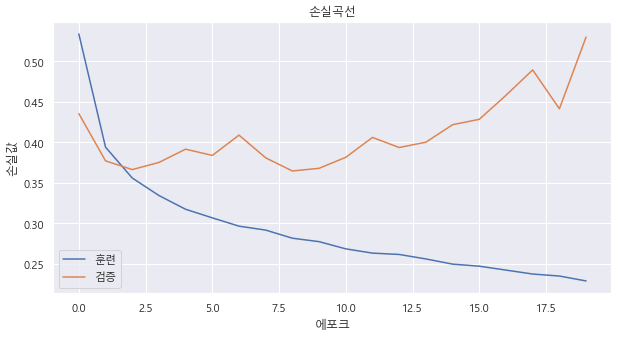

In [22]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 드롭아웃

In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5875 - accuracy: 0.7940 - val_loss: 0.4377 - val_accuracy: 0.8443
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4449 - accuracy: 0.8390 - val_loss: 0.4042 - val_accuracy: 0.8595
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4202 - accuracy: 0.8526 - val_loss: 0.3869 - val_accuracy: 0.8669
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4043 - accuracy: 0.8585 - val_loss: 0.3770 - val_accuracy: 0.8727
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3957 - accuracy: 0.8645 - val_loss: 0.3779 - val_accuracy: 0.8731
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3908 - accuracy: 0.8671 - val_loss: 0.3701 - val_accuracy: 0.8762
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3883 - accuracy: 0.8704 - val_loss: 0.3930 - val_accuracy:

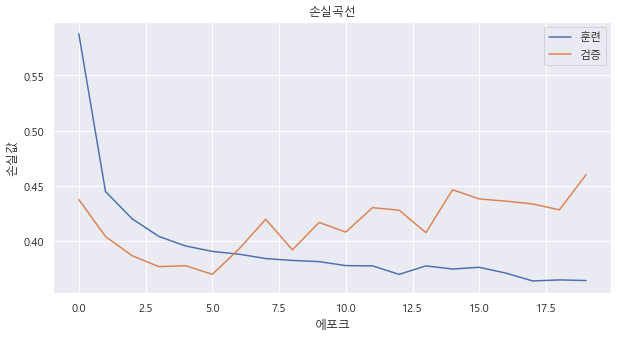

In [25]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [26]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3673 - accuracy: 0.8754 - val_loss: 0.4096 - val_accuracy: 0.8751
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3418 - accuracy: 0.8781 - val_loss: 0.3967 - val_accuracy: 0.8742
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3334 - accuracy: 0.8796 - val_loss: 0.3834 - val_accuracy: 0.8742
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3214 - accuracy: 0.8834 - val_loss: 0.3896 - val_accuracy: 0.8775
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3151 - accuracy: 0.8858 - val_loss: 0.3721 - val_accuracy: 0.8780
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3096 - accuracy: 0.8870 - val_loss: 0.3673 - val_accuracy: 0.8783
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.8858 - val_loss: 0.3599 - val_accuracy:

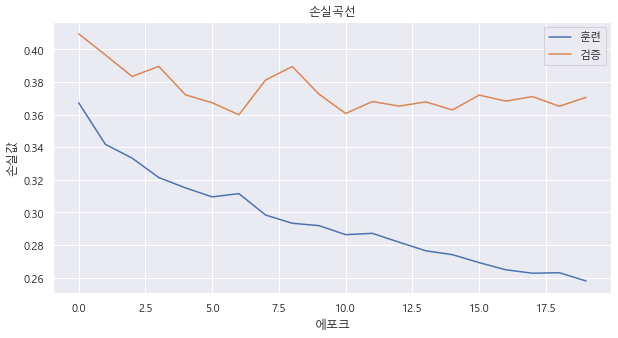

In [27]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5902 - accuracy: 0.7933 - val_loss: 0.4202 - val_accuracy: 0.8475
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4359 - accuracy: 0.8418 - val_loss: 0.3921 - val_accuracy: 0.8558
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4035 - accuracy: 0.8534 - val_loss: 0.3606 - val_accuracy: 0.8674
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3809 - accuracy: 0.8606 - val_loss: 0.3609 - val_accuracy: 0.8680
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3637 - accuracy: 0.8677 - val_loss: 0.3434 - val_accuracy: 0.8757
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3519 - accuracy: 0.8720 - val_loss: 0.3444 - val_accuracy: 0.8753
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3411 - accuracy: 0.8759 - val_loss: 0.3433 - val_accuracy:

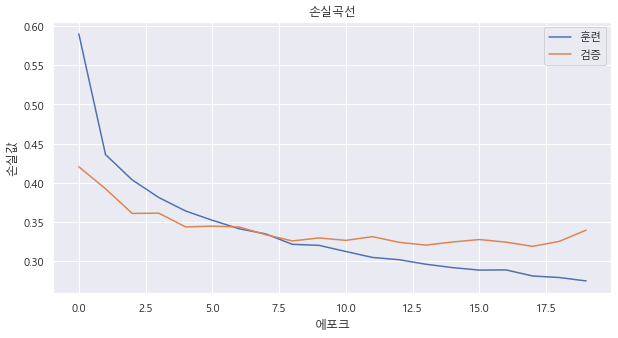

In [30]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 모델저장/로드

In [31]:
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 훈련된 가중치만 저장
model.save_weights('./data/model-weights.h5')

In [35]:
# 훈련된 전체데이어 저장
model.save('./data/model.h5')

가중치 모델 로드

In [36]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model-weights.h5')

In [37]:
model.evaluate(val_scaled, val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

전체모델 로드

In [38]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8833


[0.33925992250442505, 0.8833333253860474]

가중치만 저장하면 모델 기능 제약있음. 모델 전체 데이터저장하면 모든 기능 수행

In [39]:
model.predict(val_scaled)

375/375 [==============================] - 1s 2ms/step


array([[4.0780456e-12, 1.2888721e-17, 6.8022899e-14, ..., 3.4107011e-13,
        9.9996150e-01, 5.5818592e-19],
       [8.1965823e-08, 8.1152295e-14, 5.1725524e-10, ..., 3.4655241e-12,
        9.9999964e-01, 2.1320513e-13],
       [1.8276326e-13, 5.0534189e-14, 5.3179425e-18, ..., 9.9992251e-01,
        1.1983323e-13, 1.4342115e-08],
       ...,
       [8.0512727e-06, 1.1199364e-12, 1.2561417e-08, ..., 9.4416691e-08,
        9.9998724e-01, 3.4718082e-07],
       [9.1922397e-10, 1.5795409e-15, 3.6137185e-10, ..., 2.1392213e-13,
        1.0000000e+00, 1.5624530e-18],
       [5.6198321e-02, 5.2533051e-06, 2.2318893e-05, ..., 7.5532179e-03,
        9.6585744e-08, 7.4635088e-01]], dtype=float32)

In [40]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 1s 1ms/step


0.8833333333333333

In [41]:
val_labels

array([8, 8, 7, ..., 8, 8, 9], dtype=int64)

#### 콜백 Callback

In [42]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5917 - accuracy: 0.7926 - val_loss: 0.4302 - val_accuracy: 0.8424
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4417 - accuracy: 0.8408 - val_loss: 0.4089 - val_accuracy: 0.8537
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4056 - accuracy: 0.8516 - val_loss: 0.3745 - val_accuracy: 0.8605
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3792 - accuracy: 0.8603 - val_loss: 0.3836 - val_accuracy: 0.8583
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3643 - accuracy: 0.8652 - val_loss: 0.3559 - val_accuracy: 0.8707
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3535 - accuracy: 0.8695 - val_loss: 0.3408 - val_accuracy: 0.8744
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3392 - accuracy: 0.8732 - val_loss: 0.3480 - val_accuracy:

In [43]:
# 체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8828


[0.3308260440826416, 0.8828333616256714]

#### 조기종료

In [44]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
# save_best_only=True 가장 좋은 모델 저장됨
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1469/1500 [============================>.] - ETA: 0s - loss: 0.5978 - accuracy: 0.7888
Epoch 1: val_loss improved from inf to 0.41841, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5944 - accuracy: 0.7899 - val_loss: 0.4184 - val_accuracy: 0.8482
Epoch 2/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.4424 - accuracy: 0.8406
Epoch 2: val_loss improved from 0.41841 to 0.39078, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4423 - accuracy: 0.8406 - val_loss: 0.3908 - val_accuracy: 0.8565
Epoch 3/20
1474/1500 [============================>.] - ETA: 0s - loss: 0.4045 - accuracy: 0.8517
Epoch 3: val_loss improved from 0.39078 to 0.36402, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4046 - accuracy: 0.8518 - val_loss: 0.3640 - val_accuracy: 0.8666
Epoch 4/20
1465/1500 [===================

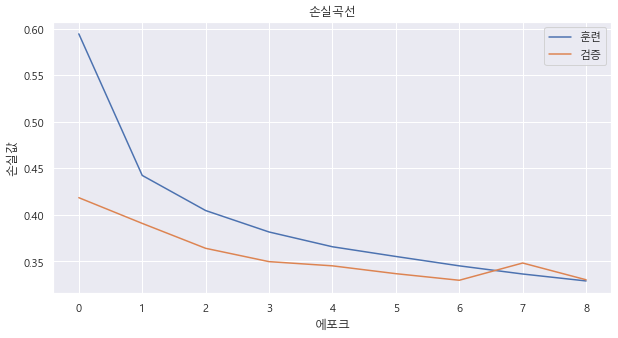

In [45]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [46]:
# 어느 에포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch # 10번째에서 멈춤(드랍아웃) - 9번째 모델이 저장됨

8

In [47]:
model.evaluate(val_scaled, val_target) # 9번째 에포크값

375/375 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.8794


[0.3296741247177124, 0.8794166445732117]

조기종료된 모델 저장값 / 체크포인트로 저장된 모델 저장값 비교

In [48]:
model_cp = keras.models.load_model('./data/best_model2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.8794


[0.3296741247177124, 0.8794166445732117]

In [49]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 1s 1ms/step


0.8794166666666666

In [50]:
### 예측결과
val_labels[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=int64)